## Importing Required Modules And The Data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.utils import Bunch
import seaborn as sns

In [2]:
boston_data = datasets.load_boston()

## Exploring The Data

In [3]:
print(type(boston_data))
print(boston_data.keys())
print(boston_data['filename'])

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
C:\Users\Matt\anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


### Comments About The Imported Data

The type of the file is displayed as class 'sklearn.utils.Bunch' and is one of many embeded datasets accessed from sklearn datasets.  This is a convenient, very easy and quick way to access some datasets where no downloads from external websites or APIs are neccessary.  The dataset is a dictionary containing 5 keys; 'data', 'target', 'feature_names', 'DESCR', 'filename'.

In [4]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Comments About The File Name And Description

Information from the 'filename' key reveals that the data is automatically stored within the user's local directory.  The 'DESCR' key in boston_data is a description of the data set including the features or columns along with reference to the source for this dataset.  According to the description, there are 506 subhurbs and and 14 attributes.  Of the 14 attributes, 13 of them are predictor variables and the 14th one is the variable to be predicted.

In [5]:
print(type(boston_data['data'])) # Exploring the 'data' key
print(boston_data['data'].shape)
print(boston_data['feature_names']) # Exploring the 'feature_names' key
print(type(boston_data['target'])) # Exploring the 'target' key
print(boston_data['target'].shape)

<class 'numpy.ndarray'>
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
<class 'numpy.ndarray'>
(506,)


### Comments About The File
Except for the values of the 'filename' and 'DESCR' keys, the values two remaining keys are numpy arrays and third one is a list of the feature names or attributes, which must be the column labels.  The data of interest here is located within 'data' containing the predictor variables 'target' containing the target variable to be predicted.  The shape of the data as expected entails 506 rows cases and 13 columns.  From the information in the description of the data, each row must represent a single subhurb in Boston and each column represents an attribute for that subhurb.  The target variable is a single array of 506 entries representing the median house price in thousands of US dollars.  

## Wrangling The Data

In [6]:
boston_raw_data = pd.DataFrame(boston_data['data']) # Converted the numpy array into a dataframe.  Both the attributes and the index column are not specified.  But printing the type shows the data is now indeed a pandas dataframe as expected.
print(type(boston_raw_data))

<class 'pandas.core.frame.DataFrame'>


In [7]:
boston_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Re-labeling the columns and printing the head, which can be done with a pandas dataframe.
The 14th attribute is PRICE; the target variable to predict.  This was added from the dictionary package key 'target'
Unlike the former approach, relabelling the columns for the data was successful this time because
the number of columns specified in the shape is equal to the number of columns the data should have.
The data has been loaded correctly.

In [8]:
boston_raw_data.columns = boston_data['feature_names']
boston_raw_data['PRICE'] = boston_data['target']
print(boston_raw_data.head()) 
boston_raw_data.to_csv('Clean Boston Data.csv')

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


### Comments On Wrangling The Data
The dataframe contained no column labels.  From the info, there are no null entries and all entries are of type float64.  The wrangling process was very quick and easy.  Only two steps were taken.  The first step was to assign the list of attributes from 'features' to the columns of the dataframe.  The second step was to assign the target variable 'MEDV' as the 14th column in the dataframe labelled as 'PRICE'.  At this point, the data is now clean and ready to be explored and analysed.

## Data Visualization And Exploration Of Data For Outliers

The distribution for each attribute was visualized through box plots and histograms. This is combined with general statistics such as mean, standard deviation max, min and quartiles using the built in describe function.
The box plots will be overlayed with jittered strip plots of the attribute data points so that the density of the data points is apparent.  The point of this is to quickly and easily identify distributions, outliers and any datapoints that don't make sense like negative entries for an attribute where only positive integers are sensible.

### 1. CRIM

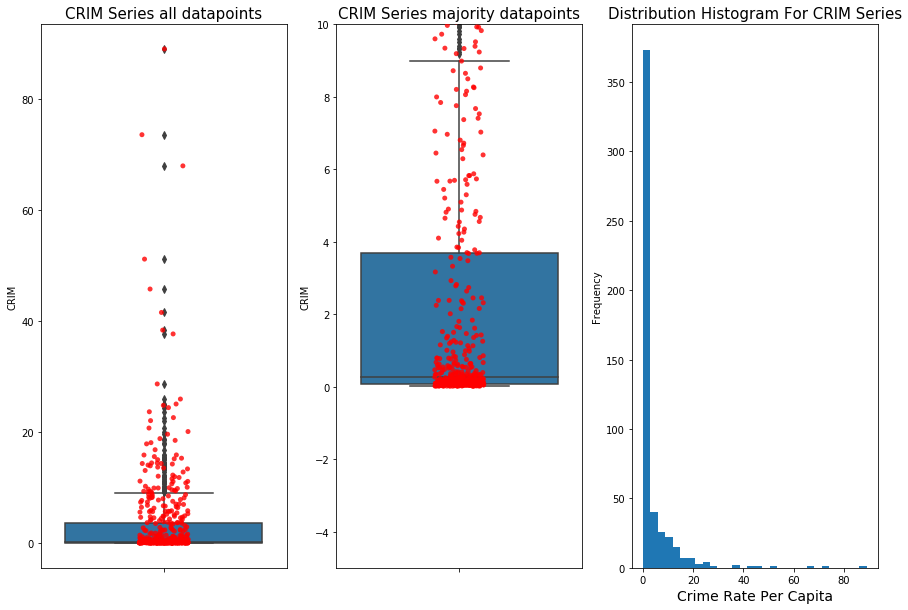

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [9]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)                                                             
sns.stripplot(y = 'CRIM', data = boston_raw_data, jitter = True, color = 'red', alpha = 0.8)
sns.boxplot(y = 'CRIM', data = boston_raw_data)
plt.axis('tight')
plt.title('CRIM Series all datapoints', fontsize = 15)
plt.subplot(1, 3, 2)
sns.stripplot(y = 'CRIM', data = boston_raw_data, jitter = True, color = 'red', alpha = 0.8)
sns.boxplot(y = 'CRIM', data = boston_raw_data)
plt.ylim([-5, 10])
plt.title('CRIM Series majority datapoints', fontsize = 15)
plt.subplot(1, 3, 3)
plt.hist(x = 'CRIM', data = boston_raw_data, bins = 30)
plt.title('Distribution Histogram For CRIM Series', fontsize = 15)
plt.xlabel('Crime Rate Per Capita', fontsize = 14)
plt.ylabel('Frequency')
plt.savefig('raw_CRIM_Series_visual_info')
plt.show()
boston_raw_data.CRIM.describe()

count    6.226537
mean     1.284683
std      2.151942
min     -5.064036
25%     -2.500487
50%     -1.360588
75%      1.302120
max      4.488369
Name: CRIM, dtype: float64


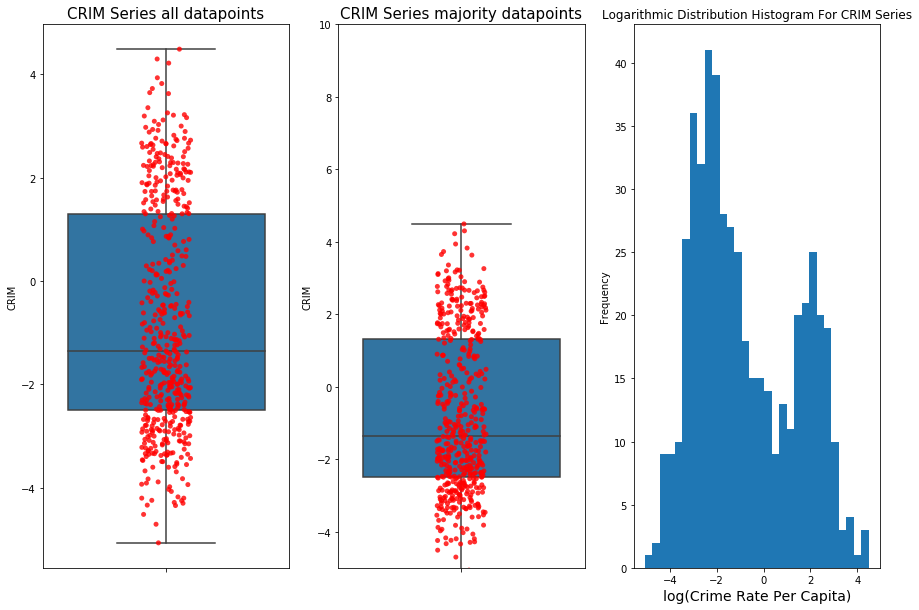

In [10]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)                                                             
sns.stripplot(y = np.log(boston_raw_data.CRIM), data = boston_raw_data, jitter = True, color = 'red', alpha = 0.8)
sns.boxplot(y = np.log(boston_raw_data.CRIM), data = boston_raw_data)
plt.axis('tight')
plt.title('CRIM Series all datapoints', fontsize = 15)
plt.subplot(1, 3, 2)
sns.stripplot(y = np.log(boston_raw_data.CRIM), data = boston_raw_data, jitter = True, color = 'red', alpha = 0.8)
sns.boxplot(y = np.log(boston_raw_data.CRIM), data = boston_raw_data)
plt.ylim([-5, 10])
plt.title('CRIM Series majority datapoints', fontsize = 15)
plt.subplot(1, 3, 3)
plt.hist(x = np.log(boston_raw_data.CRIM), bins = 30)
plt.title('Logarithmic Distribution Histogram For CRIM Series')
plt.xlabel('log(Crime Rate Per Capita)', fontsize = 14)
plt.ylabel('Frequency')
plt.savefig('CRIM_Series_visual_info')
print(np.log(boston_raw_data.CRIM.describe()))
plt.show()

### Comments About CRIM
The distribution of CRIM was an exponential decay with increasing crime rate.  But the array itself does not provide much information on the vast majority of subhurbs that have low crime.  Taking the logarithm of this array is more sensible and produced an even spread of data with a binodal distribution.

### 2. ZN

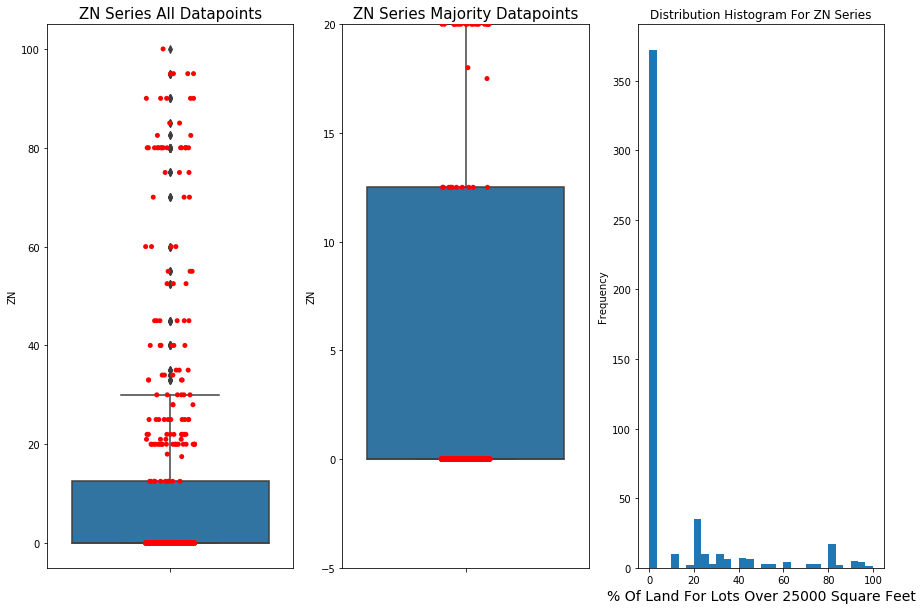

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

In [11]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
sns.stripplot(y = 'ZN', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'ZN', data = boston_raw_data)
plt.title('ZN Series All Datapoints', fontsize = 15)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'ZN', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'ZN', data = boston_raw_data)
plt.ylim([-5, 20])
plt.title('ZN Series Majority Datapoints', fontsize = 15)
plt.subplot(1, 3, 3)
plt.hist(x = 'ZN', data = boston_raw_data, bins = 30)
plt.title('Distribution Histogram For ZN Series')
plt.xlabel('% Of Land For Lots Over 25000 Square Feet', fontsize = 14)
plt.ylabel('Frequency')
plt.savefig('ZN_Series_visual_info')
plt.show()
boston_raw_data.ZN.describe()

### Comments about ZN

The vast majority of subhurbs have no residential land zoned for plots over 25000 square feet. There's a binary distribution between 0 and around 12%. There is a fairly even distribution with higher variation from 12% to 100% of the land.  This could possibly be due to farmland.  Taking the logarithm of the above distribution produces a minus range of infinity, which is not feasible.  Therefore it would be reasonable to retain all values as they are.

### 3. INDUS

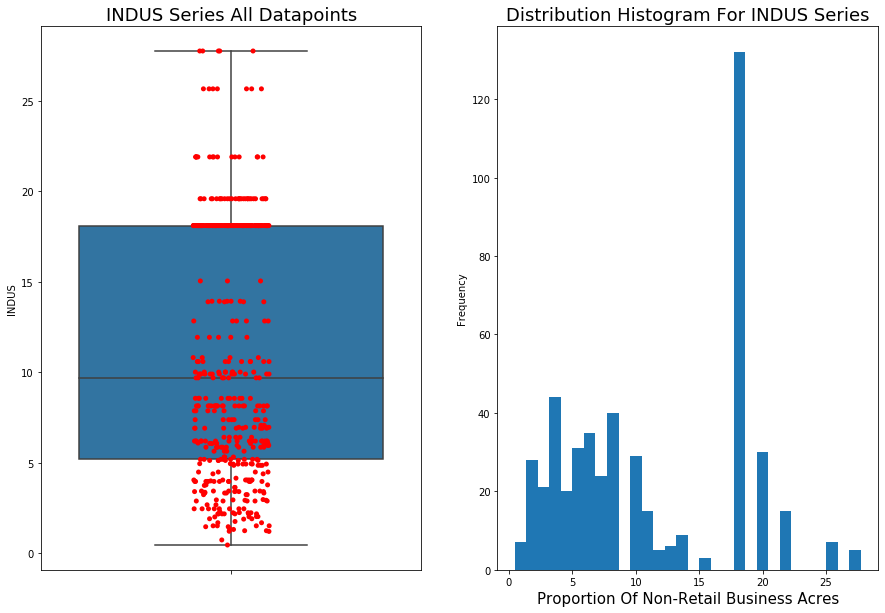

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

In [12]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1)
sns.stripplot(y = 'INDUS', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'INDUS', data = boston_raw_data)
plt.title('INDUS Series All Datapoints', fontsize = 18)
plt.axis('tight')
plt.subplot(1, 2, 2)
plt.hist(x = 'INDUS', data = boston_raw_data, bins = 30)
plt.title('Distribution Histogram For INDUS Series', fontsize = 18)
plt.xlabel('Proportion Of Non-Retail Business Acres', fontsize = 15)
plt.ylabel('Frequency')
plt.savefig('INDUS_Series_visual_info')
plt.show()
boston_raw_data.INDUS.describe()

### Comments About INDUS

There is high number of subhurbs that are situated on and very near to the top border of the interquartile range and a stratified distribution above that quantile.  The datapoints from 0% to 14% are close to a normal distribution with a right skew.

### 4. CHAS

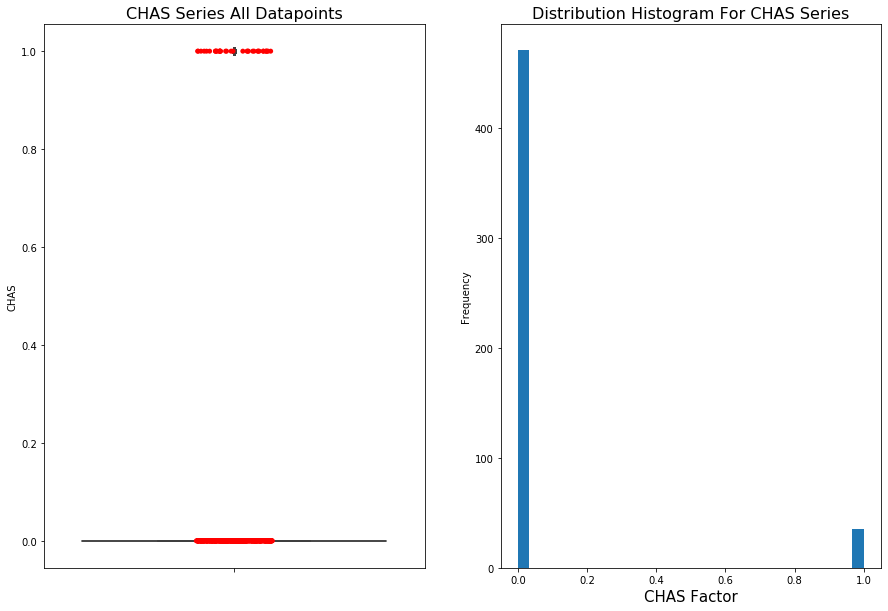

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

In [13]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1)
sns.stripplot(y = 'CHAS', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'CHAS', data = boston_raw_data)
plt.title('CHAS Series All Datapoints', fontsize = 16)
plt.axis('tight')
plt.subplot(1, 2, 2)
plt.hist(x = 'CHAS', data = boston_raw_data, bins = 30)
plt.title('Distribution Histogram For CHAS Series', fontsize = 16)
plt.xlabel('CHAS Factor', fontsize = 15)
plt.ylabel('Frequency')
plt.savefig('CHAS_Series_visual_info')
plt.show()
boston_raw_data.CHAS.describe()

### Comments About CHAS

There is clearly an absolute binary distribution between 0 and 1 indicating that this is a categorical variable.  The CHAS factor is an indication of whether the Charle's River borders or runs through the subhurb.  There a far more 0' s that 1's which makes sense since the minority of subhurbs are by a river.

### 5. NOX

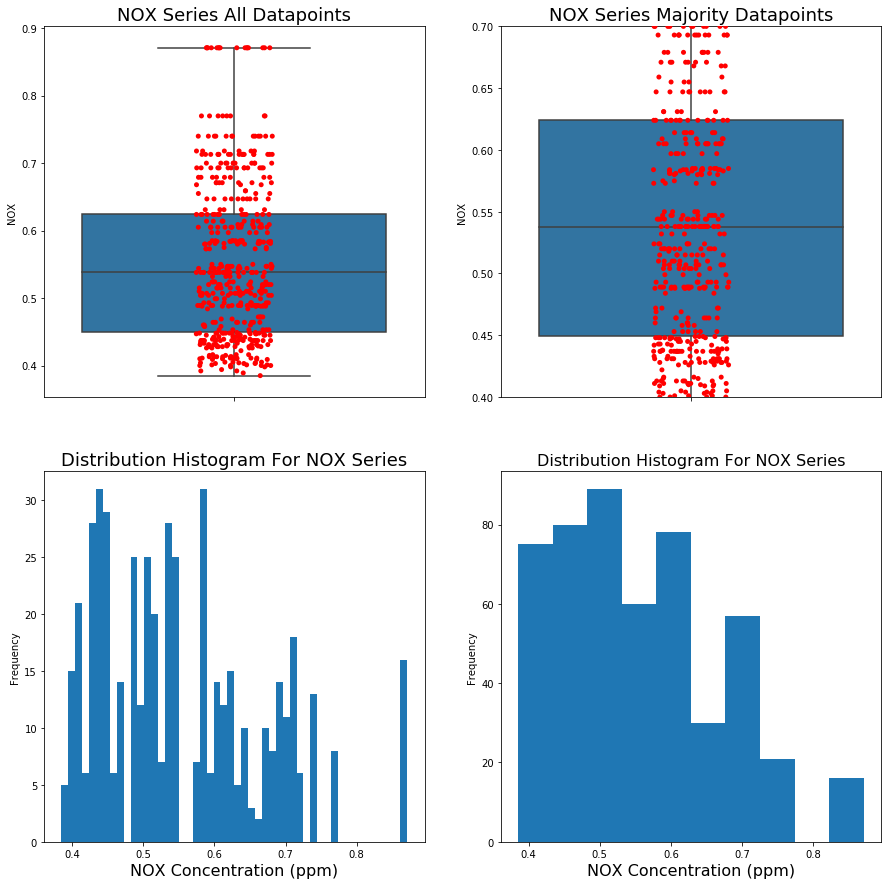

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

In [14]:
plt.figure(figsize = (15, 15))
plt.subplot(2, 2, 1)
sns.stripplot(y = 'NOX', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'NOX', data = boston_raw_data)
plt.title('NOX Series All Datapoints', fontsize = 18)
plt.axis('tight')
plt.subplot(2, 2, 2)
sns.stripplot(y = 'NOX', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'NOX', data = boston_raw_data)
plt.title('NOX Series Majority Datapoints', fontsize = 18)
plt.ylim([0.4, 0.7])
plt.subplot(2, 2, 3)
plt.hist(x = 'NOX', data = boston_raw_data, bins = 50)
plt.title('Distribution Histogram For NOX Series', fontsize = 18)
plt.xlabel('NOX Concentration (ppm)', fontsize = 16)
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)
plt.hist(x = 'NOX', data = boston_raw_data, bins = 10)
plt.title('Distribution Histogram For NOX Series', fontsize = 16)
plt.xlabel('NOX Concentration (ppm)', fontsize = 16)
plt.ylabel('Frequency')
plt.savefig('NOX_Series_visual_info')
plt.show()
boston_raw_data.NOX.describe()

### Comments About NOX

One would expect the histogram to be normally distributed because of gas diffusion.  Although when the histogram has as few as 10 bins, the distribution becomes closer to a gamma distribution which is showing the influence of diffusion.  Looking at the histogram with 50 bins, here are certain peaks in number of subhurbs at specific concentration values.  This could be due to the influences that cause NOX concentrations to remain fixed at those values.  Diffusion would lower these concentrations, so any elevation at certain points is definitely because of NOX emmisions.  NOX emmsions typically come from industrial plants and factories, cars and waste.  The concentration areas where there no subhurbs are counted are due to the absence of any of these causes of emmisions.

### 6. RM

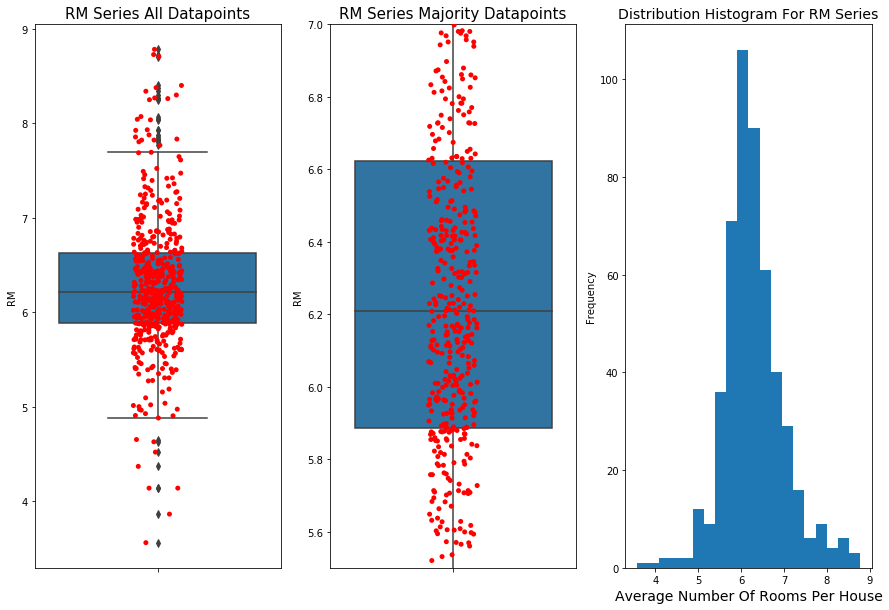

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [15]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)
sns.stripplot(y = 'RM', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'RM', data = boston_raw_data)
plt.title('RM Series All Datapoints', fontsize = 15)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'RM', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'RM', data = boston_raw_data)
plt.title('RM Series Majority Datapoints', fontsize = 15)
plt.ylim([5.5, 7])
plt.subplot(1, 3, 3)
plt.hist(x = 'RM', data = boston_raw_data, bins = 20)
plt.title('Distribution Histogram For RM Series', fontsize = 14)
plt.xlabel('Average Number Of Rooms Per House', fontsize = 14)
plt.ylabel('Frequency')
plt.savefig('RM_Series_visual_info')
plt.show()
boston_raw_data.RM.describe()

### Comments About RM

This is clearly a normal distribution indicating that RM is a completely independent variable.

### 7. AGE

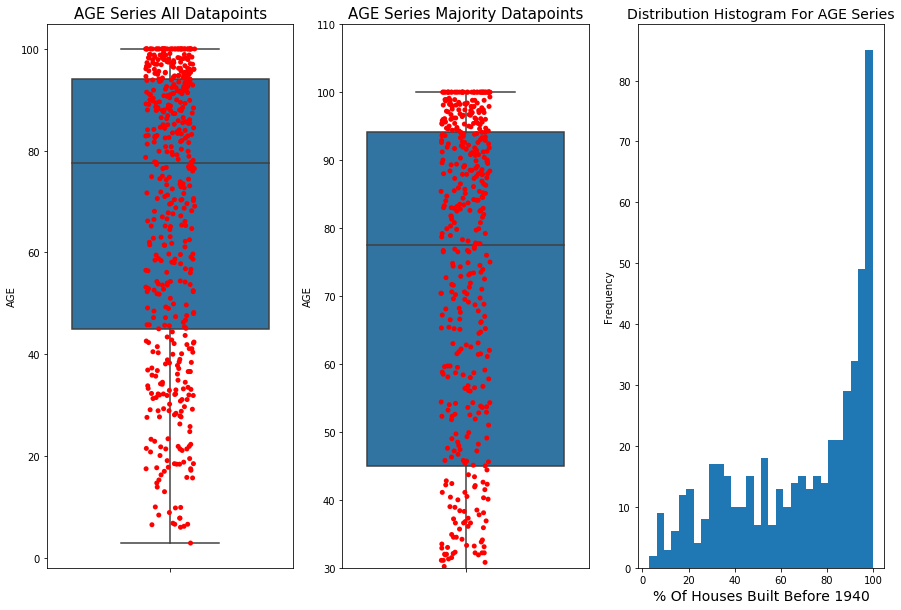

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [16]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)
sns.stripplot(y = 'AGE', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'AGE', data = boston_raw_data)
plt.title('AGE Series All Datapoints', fontsize = 15)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'AGE', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'AGE', data = boston_raw_data)
plt.title('AGE Series Majority Datapoints', fontsize = 15)
plt.ylim([30, 110])
plt.subplot(1, 3, 3)
plt.hist(x = 'AGE', data = boston_raw_data, bins = 30)
plt.title('Distribution Histogram For AGE Series', fontsize = 14)
plt.xlabel('% Of Houses Built Before 1940', fontsize = 14)
plt.ylabel('Frequency')
plt.savefig('AGE_Series_visual_info')
plt.show()
boston_raw_data.AGE.describe()

### Comments About AGE

There is an exponential growth between the AGE value and the frequency.  With in this exponential distribution, the bottom 75% of datapoints have a fairly even spread with some age values spiking more than others.  This suggests that there are quite a few subhurbs where there has been lots of new growth and construction and lots of houses within a concentrated area where there has been little or no construction or growth i.e. downtown, or older areas of Boston.

### 8. DIS

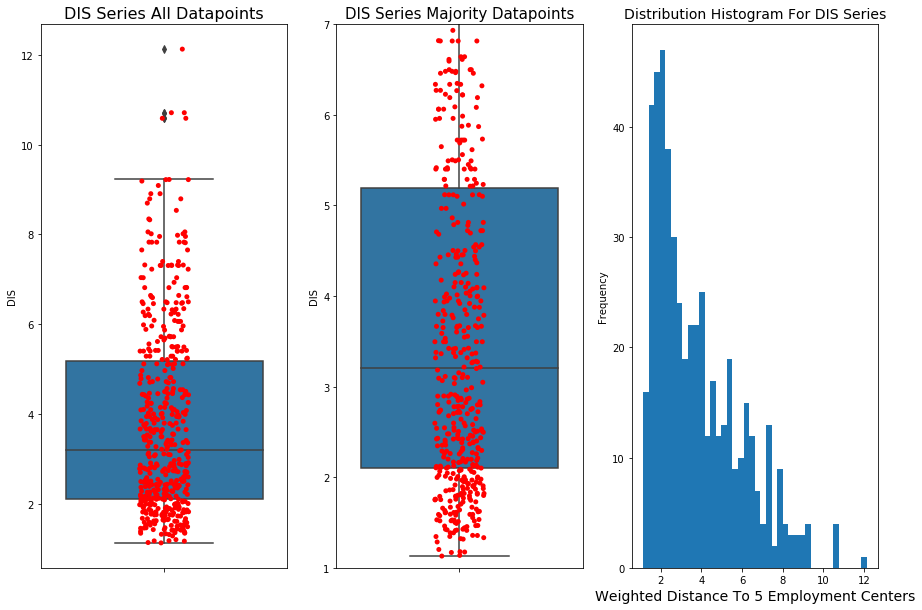

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

In [17]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)
sns.stripplot(y = 'DIS', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'DIS', data = boston_raw_data)
plt.title('DIS Series All Datapoints', fontsize = 16)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'DIS', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'DIS', data = boston_raw_data)
plt.title('DIS Series Majority Datapoints', fontsize = 15)
plt.ylim([1, 7])
plt.subplot(1, 3, 3)
plt.hist(x = 'DIS', data = boston_raw_data, bins = 40)
plt.title('Distribution Histogram For DIS Series', fontsize = 14)
plt.xlabel('Weighted Distance To 5 Employment Centers', fontsize = 14)
plt.ylabel('Frequency')
plt.savefig('DIS_Series_visual_info')
plt.show()
boston_raw_data.DIS.describe()

### Comments On DIS

This looks like a gamma distribution.  The majority of subhurbs have closer proximity to employment centers like downtown.

### 9. RAD

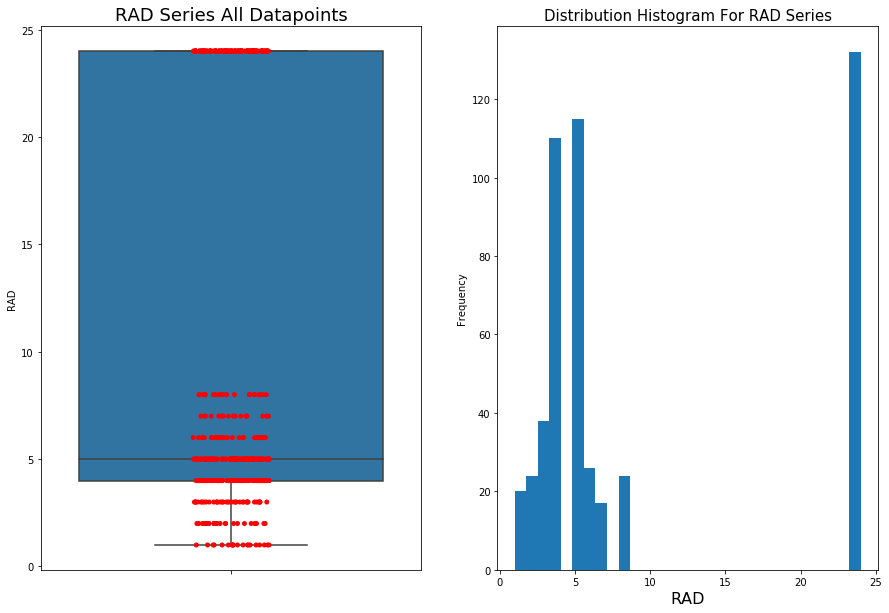

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

In [18]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1)
sns.stripplot(y = 'RAD', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'RAD', data = boston_raw_data)
plt.title('RAD Series All Datapoints', fontsize = 18)
plt.axis('tight')
plt.subplot(1, 2, 2)
plt.hist(x = 'RAD', data = boston_raw_data, bins = 30)
plt.title('Distribution Histogram For RAD Series', fontsize = 15)
plt.xlabel('RAD', fontsize = 16)
plt.ylabel('Frequency')
plt.savefig('RAD_Series_visual_info')
plt.show()
boston_raw_data.RAD.describe()

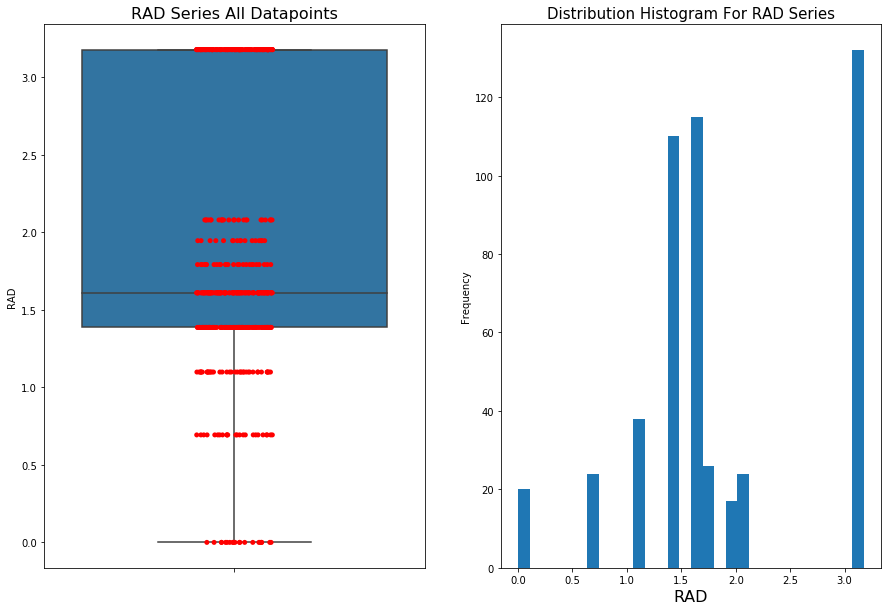

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

In [19]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1)
sns.stripplot(y = np.log(boston_raw_data.RAD), jitter = True, color = 'red')
sns.boxplot(y = np.log(boston_raw_data.RAD))
plt.title('RAD Series All Datapoints', fontsize = 16)
plt.axis('tight')
plt.subplot(1, 2, 2)
plt.hist(x = np.log(boston_raw_data.RAD), bins = 30)
plt.title('Distribution Histogram For RAD Series', fontsize = 15)
plt.xlabel('RAD', fontsize = 16)
plt.ylabel('Frequency')
plt.savefig('RAD_Series_visual_info')
plt.show()
boston_raw_data.RAD.describe()

### Comments On RAD

It is more suitable to take the logarithm of this series since the distribution becomes more interpretable.  There is clearly a stratified discrete distribution here with both the logarithmic and normal histograms indicating a group of subhurbs that have a high access to radial highways (presumably downtown) and a variation of subhurbs that have lower access to the highways.

### 10. TAX

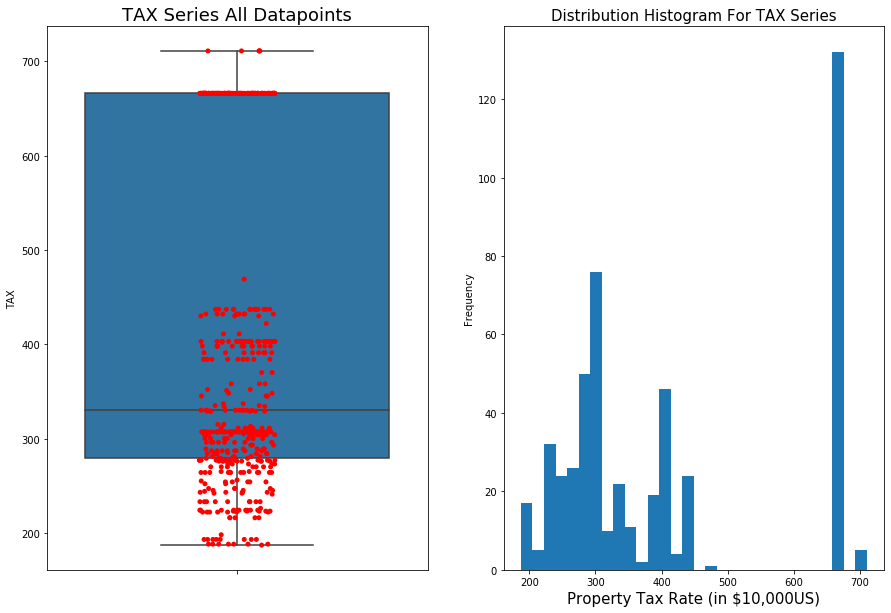

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

In [20]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1)
sns.stripplot(y = 'TAX', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'TAX', data = boston_raw_data)
plt.title('TAX Series All Datapoints', fontsize = 18)
plt.axis('tight')
plt.subplot(1, 2, 2)
plt.hist(x = 'TAX', data = boston_raw_data, bins = 30)
plt.title('Distribution Histogram For TAX Series', fontsize = 15)
plt.xlabel('Property Tax Rate (in $10,000US)', fontsize = 15)
plt.ylabel('Frequency')
plt.savefig('TAX_Series_visual_info')
plt.show()
boston_raw_data.TAX.describe()

### Comments On TAX

There are a dense population of subhurbs that have very high property tax.  The bottom 75% of datapoints partially resemble a binodal distribution.

### 11. PTRATIO

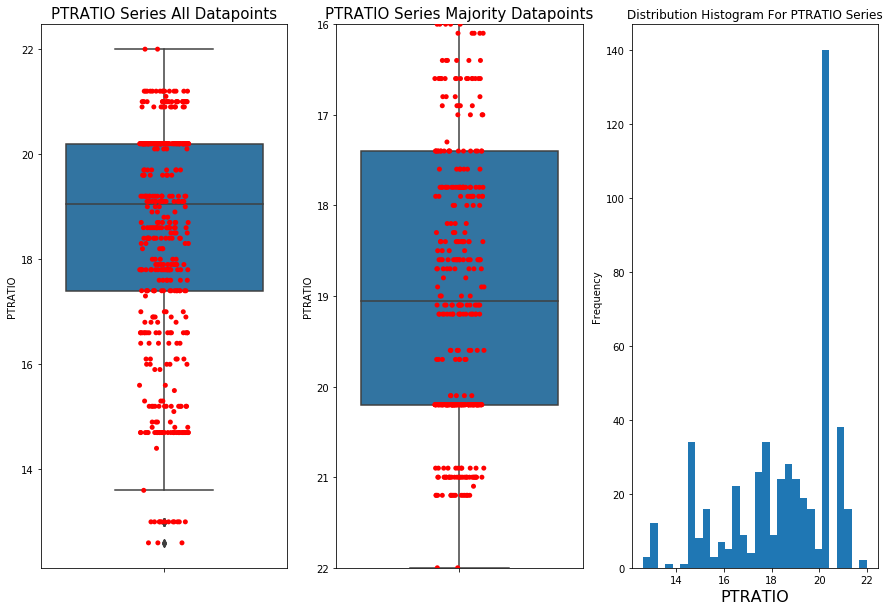

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

In [21]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)
sns.stripplot(y = 'PTRATIO', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'PTRATIO', data = boston_raw_data)
plt.title('PTRATIO Series All Datapoints', fontsize = 15)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'PTRATIO', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'PTRATIO', data = boston_raw_data)
plt.title('PTRATIO Series Majority Datapoints', fontsize = 15)
plt.ylim([22, 16])
plt.subplot(1, 3, 3)
plt.hist(x = 'PTRATIO', data = boston_raw_data, bins = 30)
plt.title('Distribution Histogram For PTRATIO Series')
plt.xlabel('PTRATIO', fontsize = 16)
plt.ylabel('Frequency')
plt.savefig('PTRATIO_Series_visual_info')
plt.show()
boston_raw_data.PTRATIO.describe()

### Comments On PTRATIO

Except for a large spike in the amount of subhurbs where the PTRATIO is around 21, which may possibly represent the downtown areas where the school and suburb population is high.  Otherwise the remaining distribution has a fairly even spread with a certain PTRATIOS spiking at higher values.  This makes some sense since many subhurbs can use the same schools if those subhurbs are located within the same districts.

### 12. B

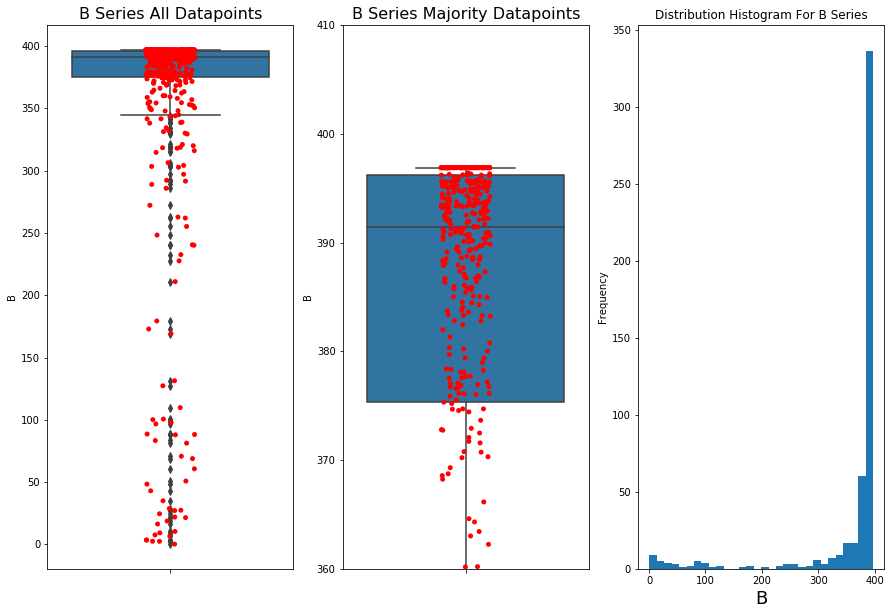

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

In [22]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)
sns.stripplot(y = 'B', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'B', data = boston_raw_data)
plt.title('B Series All Datapoints', fontsize = 16)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'B', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'B', data = boston_raw_data)
plt.title('B Series Majority Datapoints', fontsize = 16)
plt.ylim([360, 410])
plt.subplot(1, 3, 3)
plt.hist(x = 'B', data = boston_raw_data, bins = 30)
plt.title('Distribution Histogram For B Series')
plt.xlabel('B', fontsize = 18)
plt.ylabel('Frequency')
plt.savefig('B_Series_visual_info')
plt.show()
boston_raw_data.B.describe()

### Comments On B

The bottom 25 percentile for this attribute is 375.  According to the formula, the B factor can only be this high or higher if the proportion of black people is less than 2%.  Therefore the vast majority of subhurbs have less than 2% black people.
The remaining distribution of subhurbs where the B value is close to 0 means that the proportion of black people has to be close to 63% as possible.  This means that there are a large number or subhurbs with almost no black people and there are a smaller number of subhurbs that have a disproportionately high amount of black people like cultural sectors and areas.

### 13. LSTAT

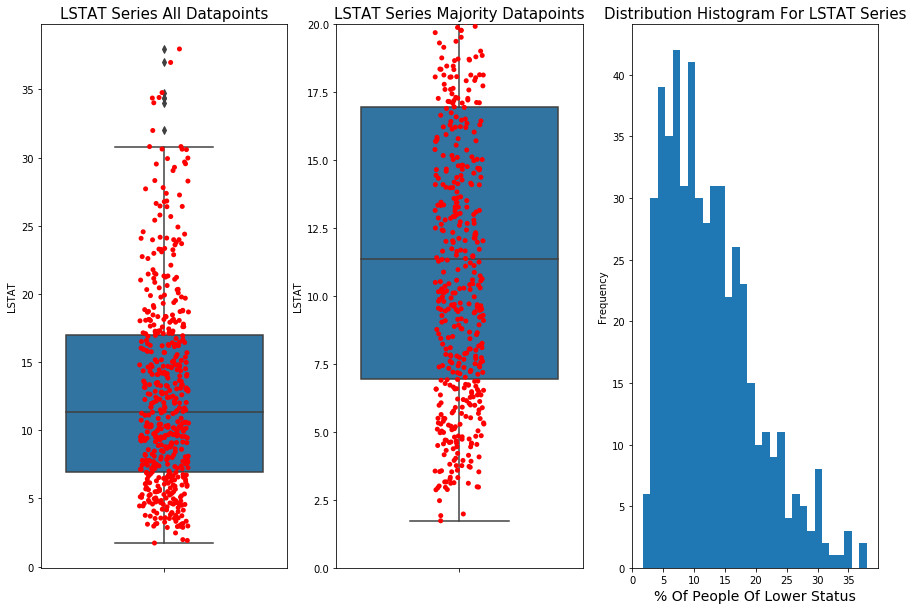

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

In [23]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)
sns.stripplot(y = 'LSTAT', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'LSTAT', data = boston_raw_data)
plt.title('LSTAT Series All Datapoints', fontsize = 15)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'LSTAT', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'LSTAT', data = boston_raw_data)
plt.title('LSTAT Series Majority Datapoints', fontsize = 15)
plt.ylim([0, 20])
plt.subplot(1, 3, 3)
plt.hist(x = 'LSTAT', data = boston_raw_data, bins = 30)
plt.title('Distribution Histogram For LSTAT Series', fontsize = 15)
plt.xlabel('% Of People Of Lower Status', fontsize = 14)
plt.ylabel('Frequency')
plt.savefig('LSTAT_Series_visual_info')
plt.show()
boston_raw_data.LSTAT.describe()

### Comments On LSTAT

This is a gamma distribution and close to a normal distribution.

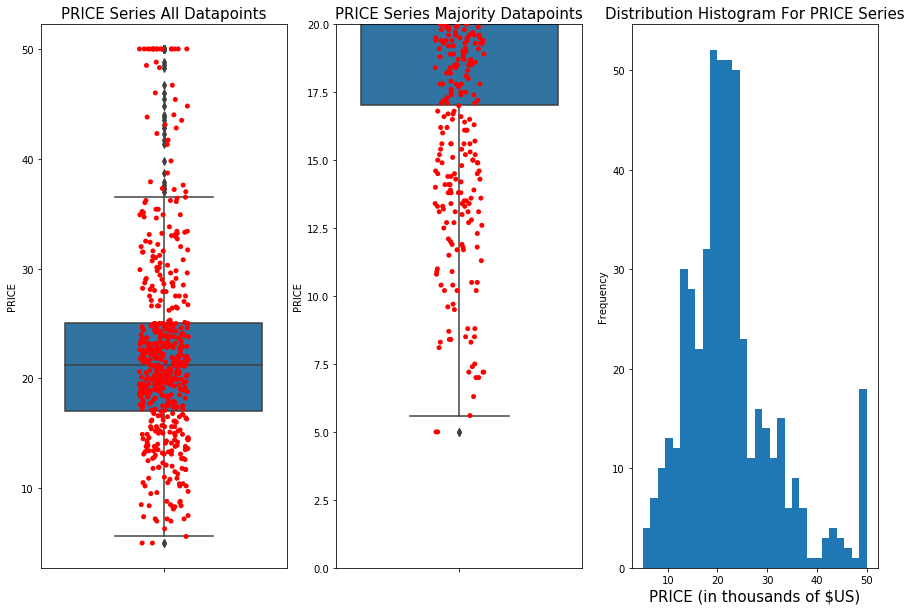

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

In [24]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)
sns.stripplot(y = 'PRICE', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'PRICE', data = boston_raw_data)
plt.title('PRICE Series All Datapoints', fontsize = 15)
plt.axis('tight')
plt.subplot(1, 3, 2)
sns.stripplot(y = 'PRICE', data = boston_raw_data, jitter = True, color = 'red')
sns.boxplot(y = 'PRICE', data = boston_raw_data)
plt.title('PRICE Series Majority Datapoints', fontsize = 15)
plt.ylim([0, 20])
plt.subplot(1, 3, 3)
plt.hist(x = 'PRICE', data = boston_raw_data, bins = 30)
plt.title('Distribution Histogram For PRICE Series', fontsize = 15)
plt.xlabel('PRICE (in thousands of $US)', fontsize = 15)
plt.ylabel('Frequency')
plt.savefig('PRICE_Series_visual_info')
plt.show()
boston_raw_data.PRICE.describe()

### Comments On PRICE

This is the distribution of the target variable.  Close to a normal distribution with a high count of the highest prices in Boston.

## Summary Of Data Visualization And Exploration
All max/min values were within their expected ranges.  Although data was scattered well outside the whiskers for many of the attributes, the logarithm was taken for a few of them to create a more workable distribution.  Outliers were present within lots of the attributes mostly due the wide spread of the data and segregated datapoints based on influences.  Some causes of the outliers are due to the nature of the measurement such as RAD, TAX, and B where high outliers are observed.  Due to the nature of the distributions and the measurements, all data is preserved.  All the columns are labelled correctly, all entries are filled in and all datapoints are sensible.  All entries are of one datatype; float64.

## Correlations And Relationships Between Variables

The following two figures below show relationships and correlations between pairs of variables.

### Pairplot Diagram

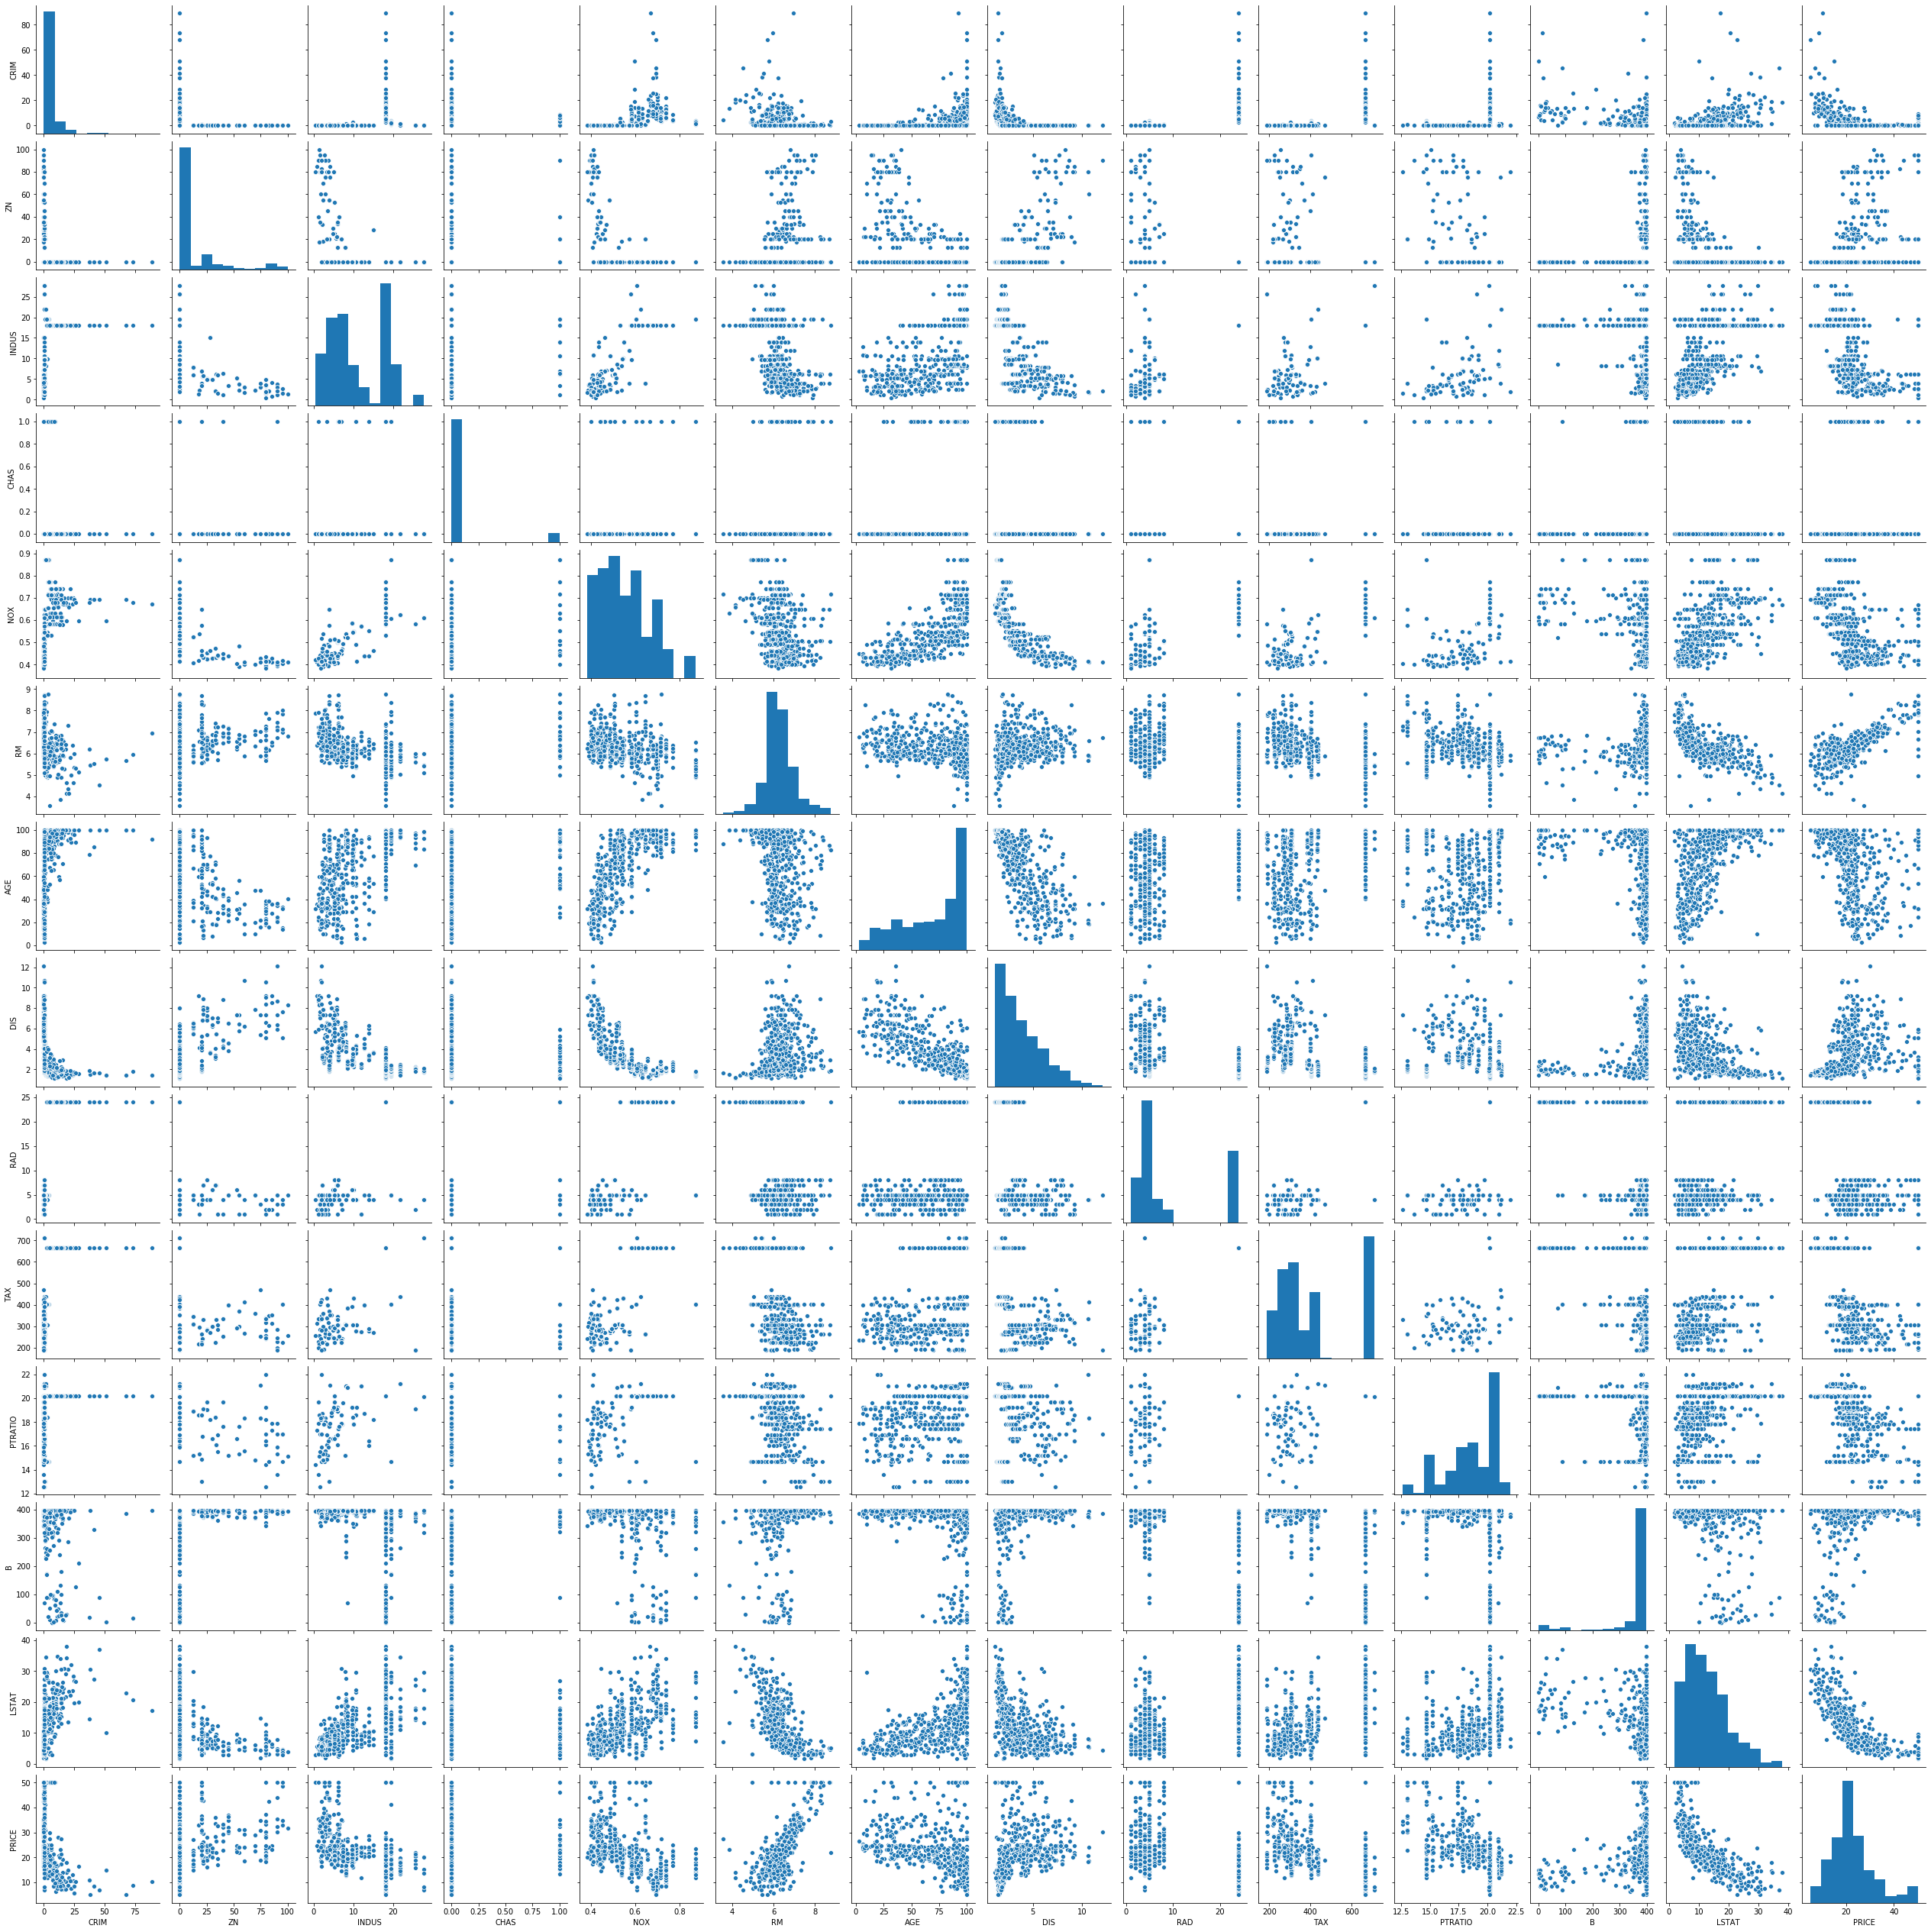

In [25]:
sns.pairplot(boston_raw_data)
plt.show()

### Correlation Matrix With Heatmap

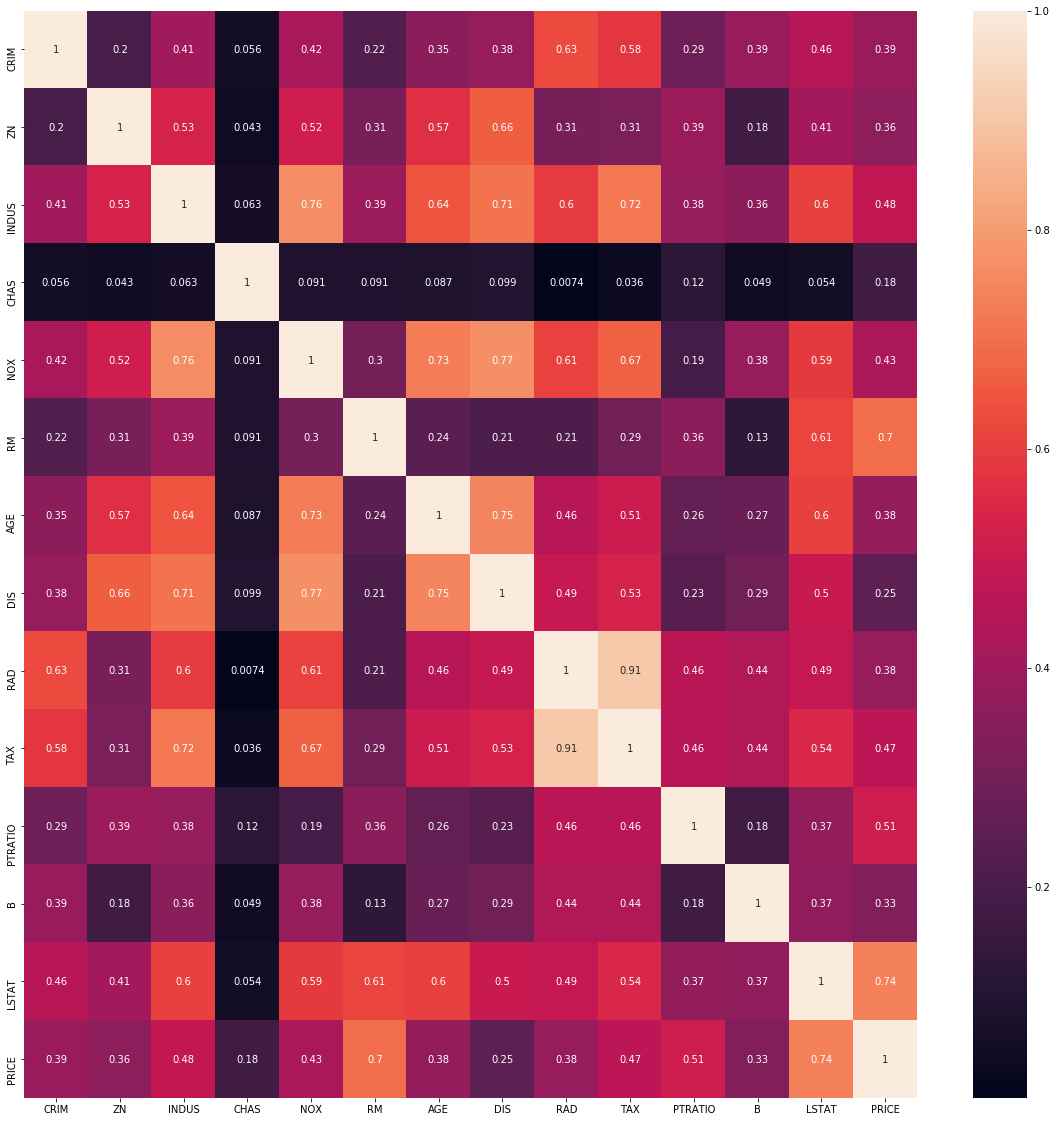

In [26]:
plt.figure(figsize = (20, 20))
boston_raw_data.corr().abs()
z = boston_raw_data.corr().abs()
sns.heatmap(data=z, annot=True)
plt.savefig('Correlation Heatmap Matrix')

### Comments On Correlation Diagrams.

The following 9 correlations will be discussed with Jointplots:
    1. TAX Versus RAD
    2. TAX Versus INDUS
    3. NOX Versus DIS
    4. NOX Versus AGE
    5. NOX Versus INDUS
    6. AGE Versus DIS
    7. INDUS Versus DIS
    8. LSTAT Versus PRICE
    9. RM Versus PRICE

### TAX Versus RAD

<Figure size 720x720 with 0 Axes>

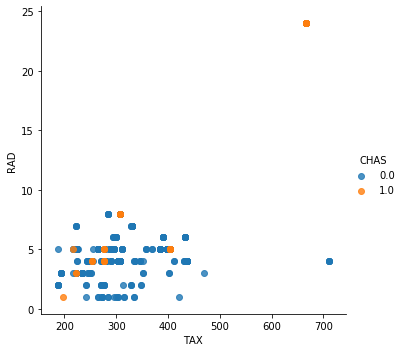

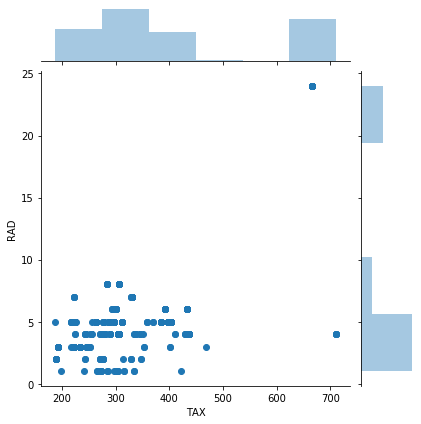

In [27]:
_= plt.figure(figsize=(10, 10))
_= sns.lmplot(x = 'TAX', y = 'RAD', data = boston_raw_data, hue = 'CHAS', fit_reg = False)
_= sns.jointplot(x = 'TAX', y ='RAD', data = boston_raw_data)
plt.savefig('TAX Versus RAD')

The jointplot shows about 120 subhurbs with a tax value of about 675 and the scatterplot hued with CHAS shows that these group of subhurbs are by the Charle's River, which border's downtown Boston, Cambridge and Charlestown.  Since Downtown Boston is surrounded by the river, it's also highly accessible to Highway 93 which explains the high RAD value.

### TAX Versus INDUS

<Figure size 720x720 with 0 Axes>

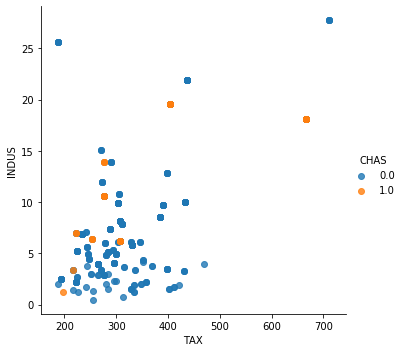

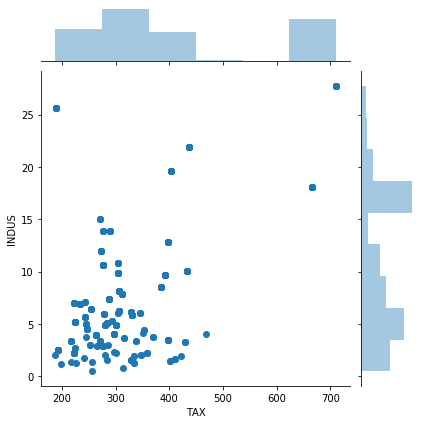

In [28]:
_= plt.figure(figsize=(10, 10))
_= sns.lmplot(x = 'TAX', y = 'INDUS', data = boston_raw_data, hue = 'CHAS', fit_reg = False)
_= sns.jointplot(x = 'TAX', y ='INDUS', data = boston_raw_data)
plt.savefig('TAX Versus INDUS')

The more non-retail businesses there are, the higher the property tax.  Specifically in downtown boston where there are alot of office buildings.

### NOX Versus DIS

<Figure size 720x720 with 0 Axes>

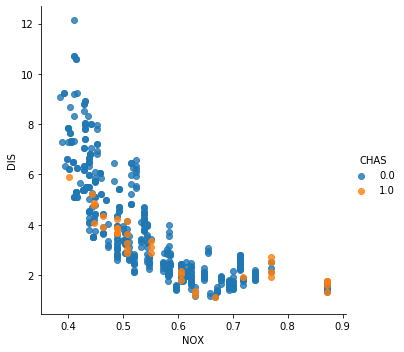

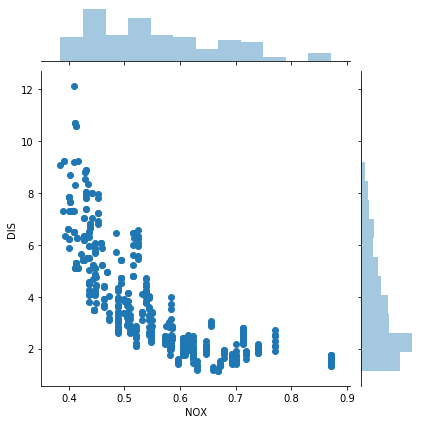

In [29]:
_= plt.figure(figsize=(10, 10))
_= sns.lmplot(x = 'NOX', y = 'DIS', data = boston_raw_data, hue = 'CHAS', fit_reg = False)
_= sns.jointplot(x = 'NOX', y ='DIS', data = boston_raw_data)
plt.savefig('NOX Versus DIS')

Downtown Boston typically has high NOX concentrations due to traffic density and pollution and also contains alot of employment centers.  Industrial areas where there are factories, warehouses and plants also emit NOX and would typically be an area where there are alot of jobs.  The less non-retail businesses there are, the lower the NOX concentrations.  This would apply to residential and rural areas in Boston where there is low non-retail business activity.

### NOX Versus AGE

<Figure size 720x720 with 0 Axes>

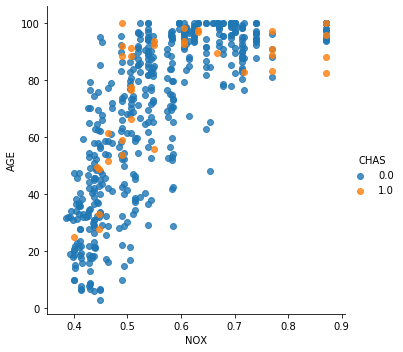

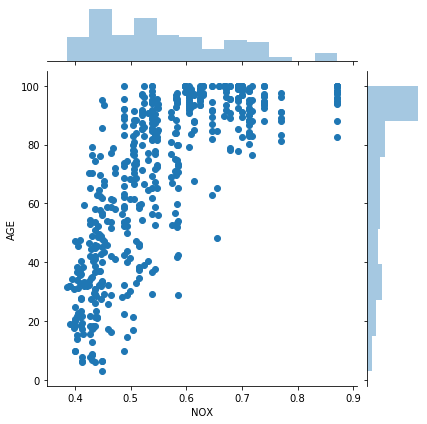

In [30]:
_= plt.figure(figsize=(10, 10))
_= sns.lmplot(x = 'NOX', y = 'AGE', data = boston_raw_data, hue = 'CHAS', fit_reg = False)
_= sns.jointplot(x = 'NOX', y ='AGE', data = boston_raw_data)
plt.savefig('NOX Versus AGE')

Older subhurbs have higher NOX emissions like downtown areas.  Residential areas of boston where there are low numbers of non-retail businesses have alot of newer houses and lower NOX concentrations.

### NOX Versus INDUS

<Figure size 720x720 with 0 Axes>

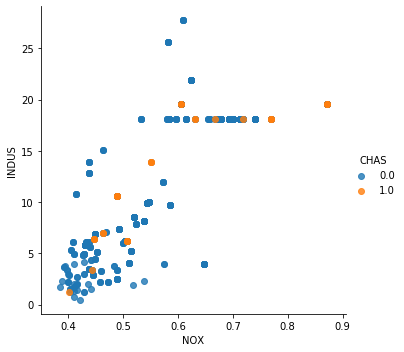

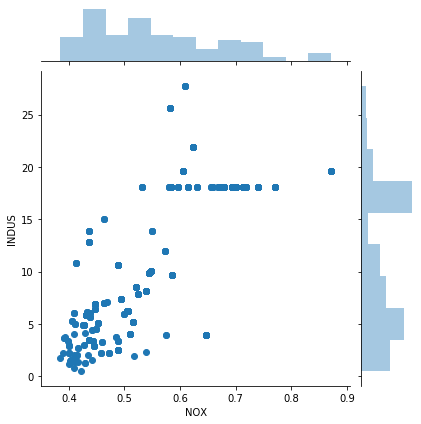

In [31]:
_= plt.figure(figsize=(10, 10))
_= sns.lmplot(x = 'NOX', y = 'INDUS', data = boston_raw_data, hue = 'CHAS', fit_reg = False)
_= sns.jointplot(x = 'NOX', y ='INDUS', data = boston_raw_data)
plt.savefig('NOX Versus INDUS')

This confirms the strong grouping between high NOX concentrations, old age subhurbs with higher numbers of non-retail businesses; some of them emit NOX.

### AGE Versus DIS

<Figure size 720x720 with 0 Axes>

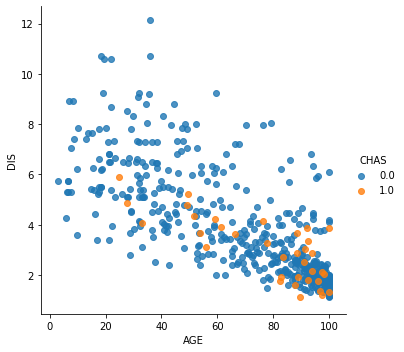

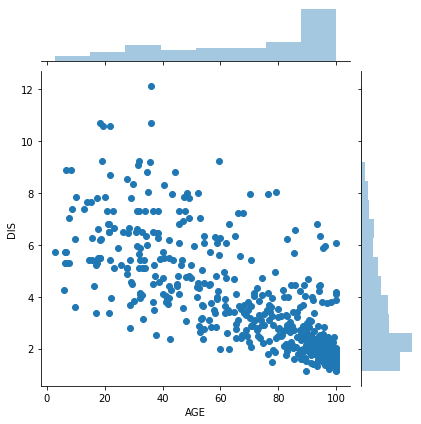

In [32]:
_= plt.figure(figsize=(10, 10))
_= sns.lmplot(x = 'AGE', y = 'DIS', data = boston_raw_data, hue = 'CHAS', fit_reg = False)
_= sns.jointplot(x = 'AGE', y ='DIS', data = boston_raw_data)
plt.savefig('AGE Versus DIS')

There are more employment centers within areas of boston where the subhurbs are older like downtown and industrial areas.  Residential and rural areas where there are low numbers of employment centers are the newer subhurbs.

### INDUS Versus DIS

<Figure size 720x720 with 0 Axes>

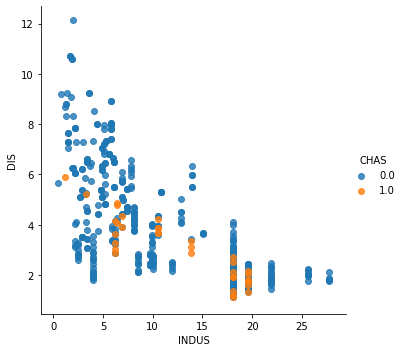

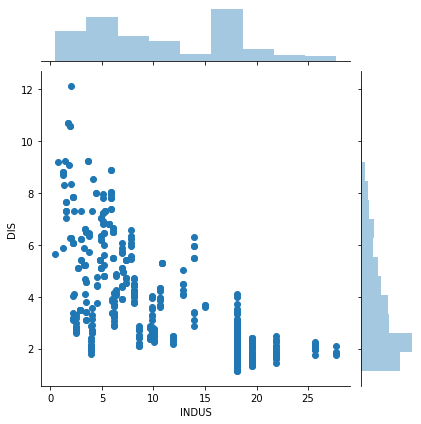

In [33]:
_= plt.figure(figsize=(10, 10))
_= sns.lmplot(x = 'INDUS', y = 'DIS', data = boston_raw_data, hue = 'CHAS', fit_reg = False)
_= sns.jointplot(x = 'INDUS', y ='DIS', data = boston_raw_data)
plt.savefig('INDUS Versus DIS')

This correlation confirms the very same relationships as discussed above.  High numbers of employment centers are close to lots of office buildings and other non-retail businesses.

### LSTAT Versus PRICE

<Figure size 720x720 with 0 Axes>

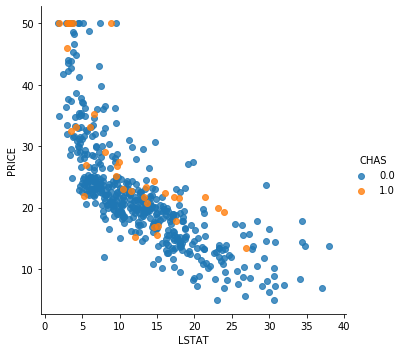

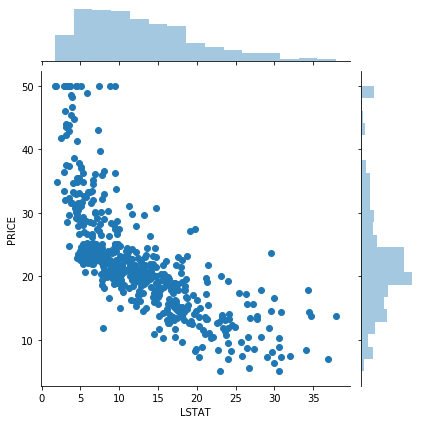

In [34]:
_= plt.figure(figsize=(10, 10))
_= sns.lmplot(x = 'LSTAT', y = 'PRICE', data = boston_raw_data, hue = 'CHAS', fit_reg = False)
_= sns.jointplot(x = 'LSTAT', y ='PRICE', data = boston_raw_data)
plt.savefig('LSTAT Versus PRICE')

People of high status have more money and can therefore afford more expensive houses.

### RM Versus PRICE

Bigger houses cost more money, so people of higher status can afford more expensive houses and therefore bigger houses.

<Figure size 720x720 with 0 Axes>

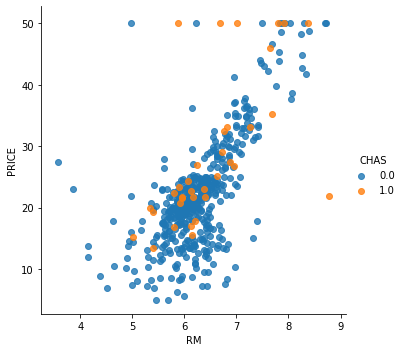

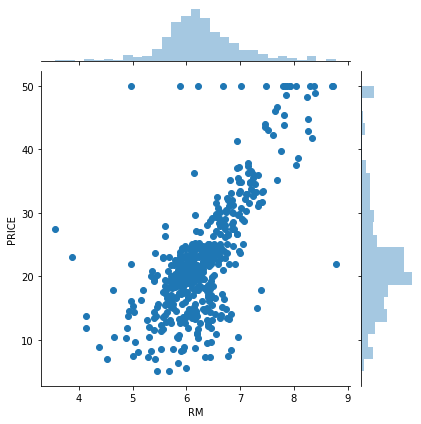

In [35]:
_= plt.figure(figsize=(10, 10))
_= sns.lmplot(x = 'RM', y = 'PRICE', data = boston_raw_data, hue = 'CHAS', fit_reg = False)
_= sns.jointplot(x = 'RM', y ='PRICE', data = boston_raw_data)
plt.savefig('RM Versus PRICE')

## Linear Regression Using OLS To Model The Data

Three different models were be created.  The first model; model_all_variables, includes all the variables.  This will be the full set.  The second model; model_independent_variables, includes only the variables in which there is no correlation coefficient at or above 0.7 between any of them.  This follows the assumption in OLS in which all predictor variables are independent of one another.  For purposes of this model, these variables will be considered independent variables.  This model will be the subset.  The third model uses the same parameters as the second model, but with a slightly reduced set of observations.  Residual outliers will be eliminated in which the reduced dataframe was used to create the third model.  All three models will be compared with one another to determine and justify the best predictive model.

These are the variables that will be retain from model_all_variables to model_independent variables:

1. CRIM
2. ZN
3. INDUS
4. CHAS
5. RM
6. AGE
7. RAD
8. PTRATIO
9. B
10. LSTAT

### Importing Regression Modules

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Regression Model Equations For The First Two Models

In [37]:
model_all_variables = ols('PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', boston_raw_data).fit()
model_independent_variables = ols('PRICE ~ CRIM + ZN + INDUS + CHAS + RM + AGE + TAX + PTRATIO + B + LSTAT', boston_raw_data).fit()
print(model_all_variables.summary())
print(model_independent_variables.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 27 May 2020   Prob (F-statistic):          6.72e-135
Time:                        17:21:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

### Summary Of Model Statistics

In [38]:
parameter_labels = ['Adjusted R_squared', 'F-statistic', 'p_value', 'AIC']
Models_Summary_DataFrame = {'model_all_variables': [0.734, 108.1, 6.72e-135, 3026],
                            'model_independent_variables': [0.698, 114.4, 8.19e-122, 3097]}
Models_Summary_DataFrame = pd.DataFrame(Models_Summary_DataFrame)
Models_Summary_DataFrame.index = parameter_labels
plt.savefig('Summary Dataframe For Statistics.png')
print(Models_Summary_DataFrame)
Models_Summary_DataFrame.to_csv('Regression Statistics Summary.csv')

                    model_all_variables  model_independent_variables
Adjusted R_squared         7.340000e-01                 6.980000e-01
F-statistic                1.081000e+02                 1.144000e+02
p_value                   6.720000e-135                8.190000e-122
AIC                        3.026000e+03                 3.097000e+03


<Figure size 432x288 with 0 Axes>

Four statistical parameters within the summery above were used to compare the different models. R_squared (or the Adjusted R_squared to account for differences in parameters), which is the coefficient of determination is the percentage of explained error by the model. The F-statistic is a measure of how significant the model is at capturing explained error. Along with the F-statistic, a p_value can be obtained from the F-distribution. This p_value is the probability of generating the same kind of data with that particular F-statistic. The AIC value measures goodness of fit, these values can be used to compare models. The model with the lower AIC value has better fit with respect to the fitted values from the model.  The adjusted R_squared is lower with the subset model because there are fewer variables by virtue of the curse of dimensionality. The F-Statistic is higher for the subset model indicating that this model poses a better fit of the origional data. The linear combination of all variables within the subset model is a stronger predictor than the full model as supported by differences in the AIC values as well. Within the subset model, the two strongest predictor variables looks like RM and CHAS with the highest coefficients and p-values close to 0. The weaker predictors were the remaining variables with coefficient values close to zero (within the linear combination of these particular 10 variables).

### Regression Plots For The Two Models

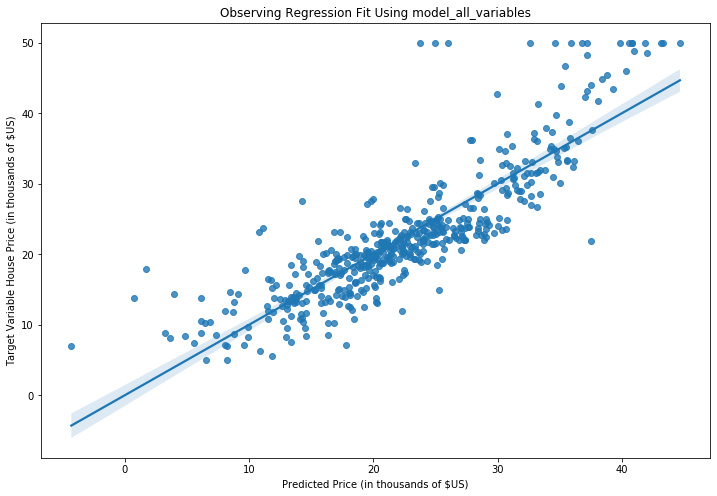

In [39]:
plt.figure(figsize=(12, 8))
_=sns.regplot(y="PRICE", x=model_all_variables.fittedvalues, data=boston_raw_data, fit_reg = True)
_=plt.xlabel("Predicted Price (in thousands of $US)")
_=plt.ylabel("Target Variable House Price (in thousands of $US)")
_=plt.title("Observing Regression Fit Using model_all_variables")
plt.savefig('Regression Plot For Model All Variables')

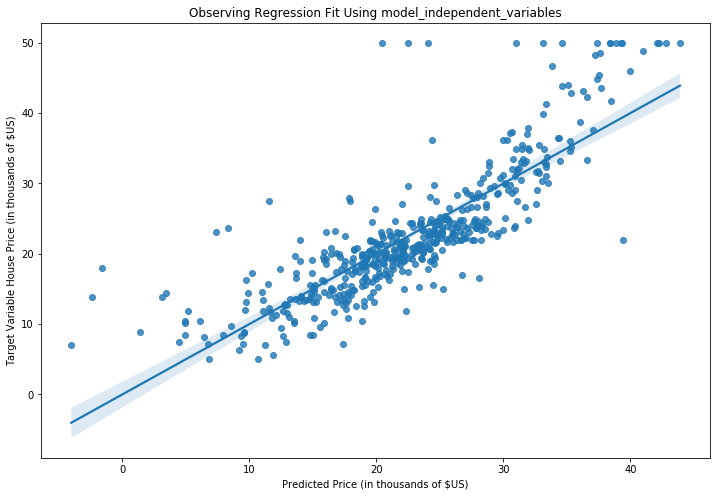

In [40]:
plt.figure(figsize=(12, 8))
_=sns.regplot(y="PRICE", x=model_independent_variables.fittedvalues, data=boston_raw_data, fit_reg = True)
_=plt.xlabel("Predicted Price (in thousands of $US)")
_=plt.ylabel("Target Variable House Price (in thousands of $US)")
_=plt.title("Observing Regression Fit Using model_independent_variables")
plt.savefig('Regression Plot For Model Independent Variables')

### Residual Plots For Both Models

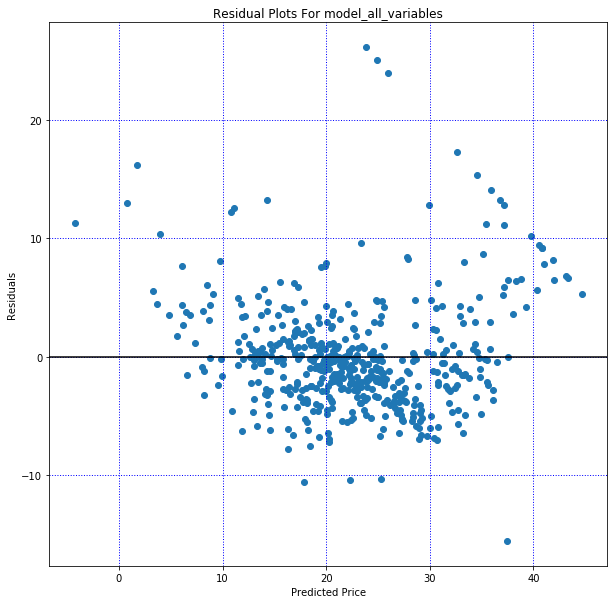

In [41]:
plt.figure(figsize=(10, 10))
_=plt.scatter(model_all_variables.fittedvalues, model_all_variables.resid)
_=plt.xlabel("Predicted Price")
_=plt.ylabel("Residuals")
_=plt.grid(color='b', linestyle=':', linewidth=1)
_=plt.axhline(0, color='black')
_=plt.title('Residual Plots For model_all_variables')
plt.savefig('Residual Plot For Model All Variables')

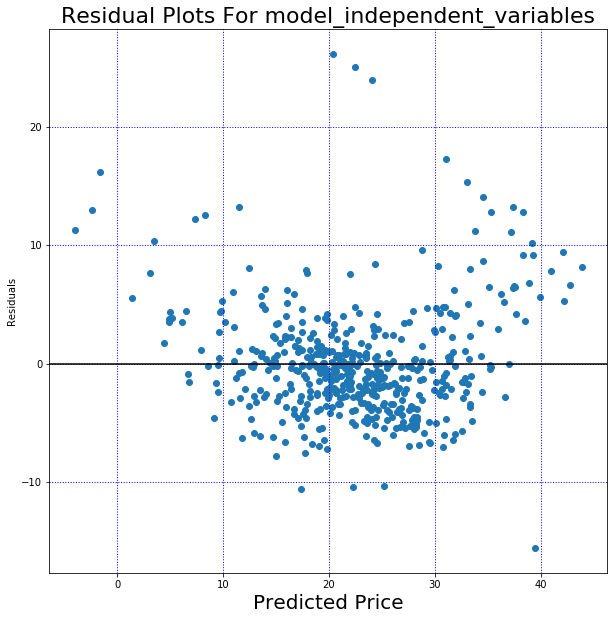

In [42]:
plt.figure(figsize=(10, 10))
_=plt.scatter(model_independent_variables.fittedvalues, model_all_variables.resid)
_=plt.xlabel("Predicted Price", fontsize = 20)
_=plt.ylabel("Residuals")
_=plt.grid(color='b', linestyle=':', linewidth=1)
_=plt.axhline(0, color='black')
_=plt.title('Residual Plots For model_independent_variables', fontsize = 22)
plt.savefig('Residual Plot For Model Independent Variables')

It's worth noting that the above regression plots and residual plots are the same.  The two graphs are only rotated within the angle of inclination of the regression slope.  The datapoints on the subset model are more concentrated at the regression line where as in the full model, the data points are more disperse.  However, as shown in the regression plots, the subset model has more uncertainty at the extreme price values than the full model.

A third model is going to be created from eliminating outliers.  In this case, any datapoint that has a residual value above or below 11 will be eliminated.  This was a balance between eliminating as little as possible while still maintaining a cleaner plot.  In this case, since the submodel is a better model than the full model, the third model will be created from the second one.

In [43]:
# Added a 15th column to the Boston_DataFrame displaying the residuals
boston_raw_data['residuals'] = model_independent_variables.resid

In [44]:
boston_data_new = boston_raw_data[abs(boston_raw_data['residuals']) < 12]
print(len(boston_data_new))
print(100*len(boston_data_new)/len(boston_raw_data))
boston_data_new.head()

492
97.23320158102767


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,residuals
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,-6.922176
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,-4.463766
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,2.712952
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,2.650636
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,5.905121


Eliminating the outliers was a trial and error process.  As a benchmark 95 percent of the data should be preserved and yet the data should include enough outliers to give the model more predictive power and increase goodness of fit as referred to by both the AIC and F-Statistic values.  The more outliers I eliminated the higher my adjusted R_squared but the F-statistic and the AIC value lowered.   The data seemed to become a better fit, but was less statistically significant due to the model ignoring the eliminated outliers in the original data.   But this is deceptive because this weakens the model's predictive power and therefore the less of a good fit my model really is. I found a good balance to be situated at eliminating any data point within the initial model with and absolute residual value of 12.  Regression and residual plots were used to visualize the changes made with manipulating the number of outliers eliminated. Above 95% of our data is preserved.  The third model will use the same variables as in the second model, but now the reduced dataframe will be used.

## Creating the final model

In [45]:
final_model = ols('PRICE ~ CRIM + ZN + INDUS + CHAS + RM + AGE + TAX + PTRATIO + B + LSTAT', boston_data_new).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     206.4
Date:                Wed, 27 May 2020   Prob (F-statistic):          6.05e-167
Time:                        17:21:05   Log-Likelihood:                -1348.6
No. Observations:                 492   AIC:                             2719.
Df Residuals:                     481   BIC:                             2765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0920      3.427     -0.610      0.5

### Regression Plot For The Final Model

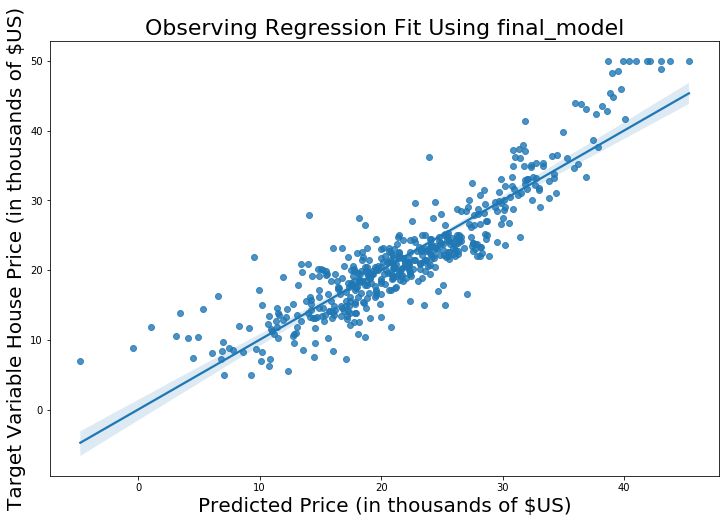

In [46]:
plt.figure(figsize=(12, 8))
_=sns.regplot(y="PRICE", x=final_model.fittedvalues, data=boston_data_new, fit_reg = True)
_=plt.xlabel("Predicted Price (in thousands of $US)", fontsize = 20)
_=plt.ylabel("Target Variable House Price (in thousands of $US)", fontsize = 20)
_=plt.title("Observing Regression Fit Using final_model", fontsize = 22)
plt.savefig('Regression Plot For Final Model')

The R_squared value increased by over 10% in the final_model to that of the model_independent_variables.

### Residual Plot For The Final Model

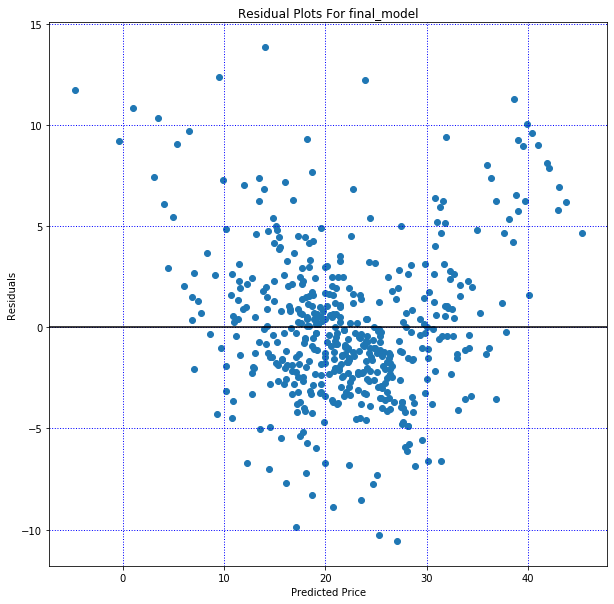

In [47]:
plt.figure(figsize=(10, 10))
_=plt.scatter(final_model.fittedvalues, final_model.resid)
_=plt.xlabel("Predicted Price")
_=plt.ylabel("Residuals")
_=plt.grid(color='b', linestyle=':', linewidth=1)
_=plt.axhline(0, color='black')
_=plt.title('Residual Plots For final_model')
plt.savefig('Residual Plot For Final Model')

The residuals in the final_model are more spread out (since they have been recalculated with the new model). The points are also more evenly spread out.

### In Depth Analysis

In this next section, three different models will be evaluated.  Using the score() method, the three different models will be compared.  The first model will be a linear regression model (very simmilar to ols regression).  The second model will be a Ridge regression and the third one will be a Lasso regression.

The linear regression model, like the ols model is a linear combination of features with their features such that the output value of a cost function coupled with the linear regression model is minimized.  A Lasso regression and a ridge regression are simmilar to a linear regression.  The difference between both of them is that unlike the two latter regression model, contains a second term within the decomposed cost function. This second term moderates the value of the coefficients by shrinking them.  This reduces model complexity and avoids over-fitting the data as in the case with simple linear regression.  The only difference between the shrinkage term in the cost function is that Ridge regression takes the sum of the squares of the coefficients where as Lasso regresssion takes the sum of the absolute value of the coefficients.  Effectively, this moderates the coefficients like Ridge regression, but this moderation results in equating coeffieients of weakly influencing features to 0.  This results in feature selection.  With Linear and Ridge regression where all coefficients are used in the linear combination of determining the predicted value of y.  With Lasso regression only some features are selected depending on the magnitude of the hyperparameter alpha (an independent variable within the function that determines the value of lambda.  This is the coefficient for the second term in the cost function for Lasso and Ridge regression).  It should be noted that with lower values of alpha result in more similarity to a simple linear regression model.

### Ridge Regression Model With Linear Regression Model

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
152 152
linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576834
ridge regression train score low alpha: 0.7419030253527293
ridge regression test score low alpha: 0.7146125373123904
ridge regression train score high alpha: 0.7172809669938278
ridge regression test score high alpha: 0.6805765856921933


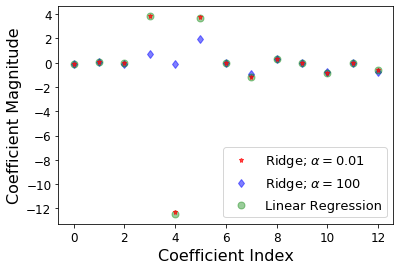

In [48]:
# Ridge Regression Code.  Starts at splitting data into train/test after wrangling the Boston Dataset for analysis.
# Both a linear regression model (ignore) and a Ridge Regression model created.  Both lr scores are calculated for train/test and compared
# Scatter plot comparing coeficients for linear regression and ridge regression with low and high alpha.  Expected that low alpha
# resembles a linear regression where high alpha resembles a different regression where the highest absolute value of coeficients
# are moderated.
# The rr case where with high alpha causes more restriction on the coeficients effectively shrinking them.
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#print boston_df.info()
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
#print boston_df.head(3)
newX=boston_df.drop('Price',axis=1)
print (newX[0:3]) # check 
newY=boston_df['Price']
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print (len(X_test), len(y_test))
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.savefig('Ridge_Linear Regression.png')
plt.show()

### Summary of Ridge Regression Model And Linear Regression Model

As observed when alpha is low, coefficients for the linear and ridge regression are roughly equal.  When alpha is high, the coefficients are shrinked closer to zero.  This is also apparent in train/test scores for Ridge and Linear Regressions with low alpha.  With a higher alpha, the test scores are lower for both the train/test sets.  Since 13 features is not a low number of features (like 3, 4, or 5 for instance) the difference in scores for linear and ridge regression for high alpha is probably due to underfitting or over-generalization of the data.

### Lasso Regression Model

training score: 0.6832133784853487
test score:  0.6364462662362061
number of features used:  11
training score for alpha=0.01: 0.7414845253242521
test score for alpha =0.01:  0.7096270988778383
number of features used: for alpha =0.01: 13
training score for alpha=0.0001: 0.7419034541315459
test score for alpha =0.0001:  0.7147428283500776
number of features used: for alpha =0.0001: 13


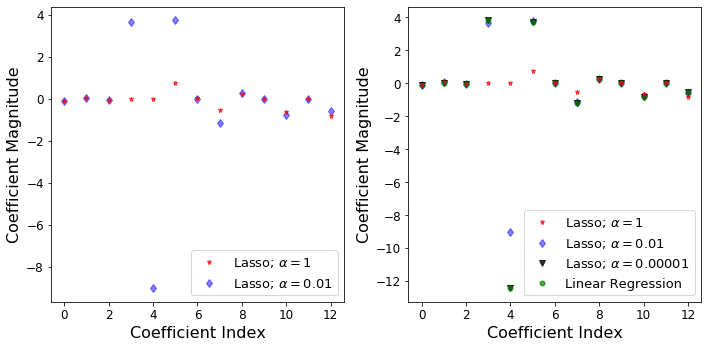

In [49]:
# Lasso Regression Code
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston # change to load_boston_dataset.
from sklearn.model_selection import train_test_split # Omit modules already imported.

lasso = Lasso() # lasso regression object with default parameters; alpha = 1. Again, lower alpha means more features used.  Hi alpha neglects features with coefficients to small to use.
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001)
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001)
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7)
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7)
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$')
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$')
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='lower right')
plt.tight_layout()
plt.savefig('CRIM_Series_visual_info')
plt.show()

### Summary of Lasso Regression Model And Linear Regression Model.

According to the scores, the Lasso regression model is less of a fit than a Ridge regression models under default conditions. When alpha is low, as in both cases above, the test scores indicate that the way they both fit the data is almost identical.  With a lower alpha value, all features are used in this case.  A higher alpha causes feature selection since the value of alpha causes 3 out of 13 coefficients to be neglected and treated as zero values.

## Conclusion

The test scores indicate that the simple linear regression is the best model (out of the three).  The other two models under fit the data lowering the scores.